# Partie Machine Learning

Dans cette partie, nous cherchons à construire un modèle prédisant le type de programme que les chaînes vont diffuser.
Nous avons commencé par supprimer les données manquantes puis nous avons construit différents modèles afin de trouver le meilleur.

## Gestion des données manquantes

Nous supprimons les données manquantes concernant les variables du type du premier et du deuxième programme, le type étant la variable que nous cherchons à expliquer. Puis nous supprimons les données manquantes de la variable *Part de marché* puisque ces données manquantes correspondent en réalité à une part de marché inférieure à 1%.
Nous pouvons nous permettre de supprimer ces données puisqu'après suppression, nous disposons encore de 30980 observations.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("base propre.csv")
data

,Date,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche,Annee,Mois,Week end
0,08 octobre 2014,mercredi,TF1,20.55,Blacklist,Serie TV,110.0,2.0,-10 ans,22.40,Arrow,Serie TV,100.0,3.0,-10 ans,24.0,2014,octobre,0
1,08 octobre 2014,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120.0,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100.0,0.0,Tout public,13.0,2014,octobre,0
2,08 octobre 2014,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115.0,0.0,Tout public,23.36,Le comte Ory,Divertissement,144.0,0.0,Tout public,12.0,2014,octobre,0
3,08 octobre 2014,mercredi,Canal +,20.55,Diana,Film,110.0,0.0,Tout public,22.45,9 mois ferme,Film,80.0,0.0,Tout public,NaN,2014,octobre,0
4,08 octobre 2014,mercredi,France 5,20.40,La maison France 5,Magazine,60.0,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49.0,0.0,Tout public,2.0,2014,octobre,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48341,31 décembre 2019,NaN,Gulli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2019,décembre,0
48342,31 décembre 2019,NaN,C Star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2019,décembre,0
48343,31 décembre 2019,NaN,Cherie 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2019,décembre,0
48344,31 décembre 2019,NaN,RMC Story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2019,décembre,0


In [3]:
data.drop(columns="Date", inplace=True)
data.isnull().sum()

Jour                     575
Chaine                     6
Heure_prgm1              575
Titre_prgm1             1264
Type_prgm1              1266
Duree_prgm1              575
Nbre_episodes_prgm1      575
Age_conseille_prgm1      575
Heure_prgm2              575
Titre_prgm2              969
Type_prgm2               974
Duree_prgm2              575
Nbre_episodes_prgm2      575
Age_conseille_prgm2      575
Part_de_marche         16227
Annee                      0
Mois                       0
Week end                   0
dtype: int64

In [4]:
data.dropna(subset=("Part_de_marche","Type_prgm1","Type_prgm2"),inplace=True)
data.isnull().sum()

Jour                   0
Chaine                 0
Heure_prgm1            0
Titre_prgm1            0
Type_prgm1             0
Duree_prgm1            0
Nbre_episodes_prgm1    0
Age_conseille_prgm1    0
Heure_prgm2            0
Titre_prgm2            0
Type_prgm2             0
Duree_prgm2            0
Nbre_episodes_prgm2    0
Age_conseille_prgm2    0
Part_de_marche         0
Annee                  0
Mois                   0
Week end               0
dtype: int64

In [5]:
data

,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche,Annee,Mois,Week end
0,mercredi,TF1,20.55,Blacklist,Serie TV,110.0,2.0,-10 ans,22.40,Arrow,Serie TV,100.0,3.0,-10 ans,24.0,2014,octobre,0
1,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120.0,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100.0,0.0,Tout public,13.0,2014,octobre,0
2,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115.0,0.0,Tout public,23.36,Le comte Ory,Divertissement,144.0,0.0,Tout public,12.0,2014,octobre,0
4,mercredi,France 5,20.40,La maison France 5,Magazine,60.0,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49.0,0.0,Tout public,2.0,2014,octobre,0
5,mercredi,M6,20.50,Le meilleur pâtissier,Divertissement,110.0,0.0,Tout public,22.40,Le meilleur pâtissier : à vos fourneaux !,Divertissement,100.0,0.0,Tout public,12.0,2014,octobre,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47740,lundi,6ter,21.05,Rupture pour tous,Film,110.0,0.0,-10 ans,22.55,Hors de prix,Film,120.0,0.0,Tout public,0.0,2019,décembre,0
47741,lundi,TF1 Series,21.00,Un festival pour Noël,Telefilm,100.0,0.0,Tout public,22.40,La clé d'un Noël réussi,Telefilm,105.0,0.0,Tout public,2.0,2019,décembre,0
47743,lundi,RMC Story,20.55,Enquête prioritaire,Magazine,80.0,0.0,Tout public,23.05,"La Poste, une logistique XXL",Documentaire,65.0,0.0,Tout public,0.0,2019,décembre,0
47744,lundi,RMC Decouverte,20.55,Le convoi de l'extrême : le choc des titans,Divertissement,90.0,4.0,Tout public,Suite prgm1,Le convoi de l'extrême : le choc des titans,Divertissement,0.0,4.0,Tout public,1.0,2019,décembre,0


In [6]:
data.to_csv("Donnees_sans_na.csv",index=False)

## Recodage des données

Nous recodons nos variables qualitatives à l'aide de LabelEncoder et de OneHotEncoder. 

LabelEncoder : 
- Jour
- Mois
- Heure du programme
- Age conseillé 
- Type du programme

OneHotEncoder : 
- Chaîne
- Type du programme suivant

In [1]:
import ML

In [2]:
data = ML.pd.read_csv("Donnees_sans_na.csv", sep=",")

In [3]:
X,y = ML.recodage(data)

## Séparation de l'échantillon

Nous séparons l'écantillon en échantillon d'apprentissage pour entrainer nos modèles et en échantillon test pour tester notre meilleur modèle. 
Etant donné la taille de notre base de données, l'échantillon d'entrainement représentera 60% de notre échantillon de base afin de réduire les temps de calcul.

In [4]:
X_train, X_test, y_train, y_test = ML.split(X,y,0.4)

## Normalisation

In [5]:
X_train_ess, X_train_emm, X_test_ess, X_test_emm = ML.normalisation(X_train, X_test)

## Recherche du meilleur modèle

### Random Forest  - Choix des paramètres et meilleure normalisation

In [6]:
rfc = ML.GridSearchCV(estimator=ML.RFC(),param_grid=dict(n_estimators=list(range(10,110,10))),cv=5)

In [7]:
rfc1 = rfc.fit(X_train,y_train.ravel())
print(rfc1.best_score_)

0.8990211005856377


#### Normalisation par Standard Scaler

In [8]:
rfc_ss = rfc.fit(X_train_ess,y_train.ravel())
print(rfc_ss.best_score_)

0.9010655287056851


#### Normalisation par MinMax Scaler

In [9]:
rfc_mm= rfc.fit(X_train_emm,y_train.ravel())
print(rfc_mm.best_score_)

0.9008504750356119


### SVC - Choix des paramètres et meilleure normalisation

In [10]:
svc = ML.GridSearchCV(estimator=ML.SVC(),
                     param_grid=dict(C=[0.01,0.1,1,10,20])
                     )

In [12]:
svc1 = svc.fit(X_train,y_train.ravel())
print(svc1.best_score_)

0.44959192625424704


#### Normalisation par Standard Scaler

In [13]:
svc_ss = svc.fit(X_train_ess,y_train.ravel())
print(svc_ss.best_score_)

0.8818055477768647


#### Normalisation par MinMax Scaler

In [14]:
svc_mm= svc.fit(X_train_emm,y_train.ravel())
print(svc_mm.best_score_)

0.8721759046400507


### KNN - Choix des paramètres et meilleure normalisation

In [15]:
knn = ML.GridSearchCV(estimator=ML.KNN(),
                     param_grid=dict(n_neighbors=list(range(1, 31)))
                     )

In [16]:
knn1 = knn.fit(X_train,y_train.ravel())
print(knn1.best_score_)

0.6771570599471513


#### Normalisation par Standard Scaler

In [17]:
knn_ss = knn.fit(X_train_ess,y_train.ravel())
print(knn_ss.best_score_)

0.8550680089141627


#### Normalisation par MinMax Scaler

In [18]:
knn_mm = knn.fit(X_train_emm,y_train.ravel())
print(knn_mm.best_score_)

0.8454384670812309


### Gaussian Process - Choix des paramètres et meilleure normalisation

Cette partie nécessitant un grand temps de calcul et engendrant des problèmes de mémoire, nous réalisons ce modèle sur un échantillon d'entrainement plus réduit, représentant 20% de l'échantillon original.

In [4]:
X_train, X_test, y_train, y_test = ML.split(X,y,0.8)
X_train_ess, X_train_emm, X_test_ess, X_test_emm = ML.normalisation(X_train, X_test)

In [5]:
kernel = 1.0 * ML.RBF(1.0)
gpc = ML.GPC(kernel=kernel,random_state=0).fit(X_train, y_train)
gpc.score(X_train, y_train)

C:\Users\carrefour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carrefour\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:432: RuntimeWarning: overflow encountered in exp
  - np.log(np.diag(L)).sum()


0.8636216914138154

#### Normalisation par Standard Scaler

In [28]:
kernel = 1.0 * ML.RBF(1.0)
gpc_ss = ML.GPC(kernel=kernel,random_state=0).fit(X_train_ess, y_train)
gpc_ss.score(X_train_ess, y_train)

C:\Users\carrefour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9273724983860555

In [6]:
kernel_rq = (1.0) * ML.RationalQuadratic(alpha=0.1, length_scale=1)
gpc_ss_rq = ML.GPC(kernel=kernel_rq,random_state=0).fit(X_train_ess, y_train)
gpc_ss_rq.score(X_train_ess, y_train)

C:\Users\carrefour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9373789541639768

#### Normalisation par MinMax Scaler

In [7]:
kernel = 1.0 * ML.RBF(1.0)
gpc_mm = ML.GPC(kernel=kernel,random_state=0).fit(X_train_emm, y_train)
gpc_mm.score(X_train_emm, y_train)

C:\Users\carrefour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.89380245319561

In [8]:
kernel_rq = (1.0) * ML.RationalQuadratic(alpha=0.1, length_scale=1)
gpc_mm_rq = ML.GPC(kernel=kernel_rq,random_state=0).fit(X_train_emm, y_train)
gpc_mm_rq.score(X_train_emm, y_train)

C:\Users\carrefour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9125242091672047

## Meilleur estimateur

Parmi les différents modèles entrainés précédemment, celui obtenant le meilleur score est le Gaussian Process avec normalisation par StandardScaler. Il permet d'obtenir un score de 0.94 sur les données d'entrainement et 0.85 sur les données test.

In [10]:
predicteur = gpc_ss_rq
print(predicteur)
print(predicteur.score(X_test_ess, y_test))

GaussianProcessClassifier(copy_X_train=True,
                          kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=0,
                          warm_start=False)
0.8471773904311025


In [11]:
table_predite = predicteur.predict(X_test_ess)
table_predite

array([4, 0, 1, ..., 2, 5, 0])

## Comparaison prédiction - réalité

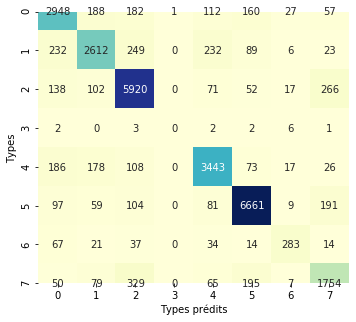

In [12]:
comp = ML.rpz_resultat(predicteur,X_test_ess, y_test)

| Type      |     Codage    | Erreur |
| ------------- |: -------------: |: -------------: |
| Divertissement      |        0        | 20% |
| Documentaire        |        1        | 24% |
| Film      |        2        | 10% |
| Information      |        3        | 100% | 
| Magazine        |        4        | 15% |
| Série TV      |        5        | 8% |
| Sport        |        6        | 40% |
| Téléfilm      |        7        | 29% |

## Ouverture

Ce qu'on a : un modèle qui prédit les types de programmes de chaque chaîne (la notre et les concurrentes).

Ce qu'on peut faire avec : $Max ~~ \alpha_i(Prog_{TF1}, \hat{Prog_{autres}})$, $\alpha_{i}$ part de marché.